In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import plotly for visualization
# !pip install chart_studio
import plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials # Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1-1BLVB-uE1xwGJqKCOlX7830NKZAGqWt' # The shareable link
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_cleaned3.csv')  

app = pd.read_csv('app_cleaned3.csv')# Dataset is now stored in a Pandas Dataframe
print('Training data shape: ', app.shape)
app.head()

1-1BLVB-uE1xwGJqKCOlX7830NKZAGqWt
Training data shape:  (307508, 58)


,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CREDIT_INTEREST,CLIENT_AGE,CLIENT_AGE_EMPLOYED
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.061,25.920548,1.745205
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1293502.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,0,0,0,School,0.622246,0.535276,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.028,45.931507,3.254795
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,0,0,0,Government,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050,52.180822,0.616438
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,0,0,0,Business Entity Type 3,0.650442,0.535276,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.095,52.068493,8.326027
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,0,1,1,Religion,0.322738,0.535276,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.043,54.608219,8.323288


In [ ]:
app.drop(['Unnamed: 0'], axis = 1, inplace= True)


In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307508 entries, 0 to 307507
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307508 non-null  int64  
 1   NAME_CONTRACT_TYPE           307508 non-null  object 
 2   CODE_GENDER                  307508 non-null  object 
 3   FLAG_OWN_CAR                 307508 non-null  object 
 4   FLAG_OWN_REALTY              307508 non-null  object 
 5   CNT_CHILDREN                 307508 non-null  int64  
 6   AMT_INCOME_TOTAL             307508 non-null  float64
 7   AMT_CREDIT                   307508 non-null  float64
 8   AMT_ANNUITY                  307508 non-null  float64
 9   AMT_GOODS_PRICE              307508 non-null  float64
 10  NAME_TYPE_SUITE              307508 non-null  object 
 11  NAME_INCOME_TYPE             307508 non-null  object 
 12  NAME_EDUCATION_TYPE          307508 non-null  object 
 13 

In [ ]:
app.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,CREDIT_INTEREST,CLIENT_AGE,CLIENT_AGE_EMPLOYED
count,307508.00000,307508.000000,3.075080e+05,3.075080e+05,307508.000000,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.0,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.00000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,0.08073,0.417056,1.687970e+05,5.990268e+05,27108.595495,5.990268e+05,0.020868,-4986.137584,-2994.208382,1.0,0.819888,0.199367,0.998133,0.281066,0.056720,2.152666,2.031521,0.078174,0.230453,0.179553,5.145022e-01,0.515694,-962.860075,0.000042,0.710030,0.000081,0.015112,0.088056,0.000189,0.081373,0.003896,0.000023,0.003912,0.000007,0.003525,0.002937,0.00121,0.009928,0.000267,0.008127,0.000595,0.000507,0.000335,0.053636,43.937100,5.355786
std,0.27242,0.722124,2.371237e+05,4.024923e+05,14493.932193,4.024923e+05,0.013831,3522.896819,1509.449226,0.0,0.384282,0.399525,0.043164,0.449520,0.231308,0.910683,0.502739,0.268445,0.421123,0.383815,1.908704e-01,0.174736,826.810973,0.006502,0.453749,0.009016,0.121998,0.283377,0.013732,0.273408,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099145,0.016328,0.089781,0.024388,0.022518,0.018299,0.022523,11.956111,6.320755
min,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.500000e+04,0.000290,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022000,20.517808,0.000000
25%,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.700000e+05,0.010006,-7480.000000,-4299.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037000,34.008219,0.791781
50%,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,5.135310e+05,0.018850,-4504.000000,-3254.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,43.150685,3.326027
75%,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,8.086500e+05,0.028663,-2010.000000,-1720.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,6.634218e-01,0.636376,-274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000

In [ ]:
app.describe(exclude = 'number').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307508,2,Cash loans,278231
CODE_GENDER,307508,3,F,202447
FLAG_OWN_CAR,307508,2,N,202922
FLAG_OWN_REALTY,307508,2,Y,213309
NAME_TYPE_SUITE,307508,8,Unaccompanied,248525
NAME_INCOME_TYPE,307508,8,Working,158773
NAME_EDUCATION_TYPE,307508,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307508,5,Married,196431
NAME_HOUSING_TYPE,307508,6,House / apartment,272866
OCCUPATION_TYPE,307508,22,Pension,55357


In [ ]:
app['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
app = app[app['CODE_GENDER'] != 'XNA']

## EDA

<function matplotlib.pyplot.show>

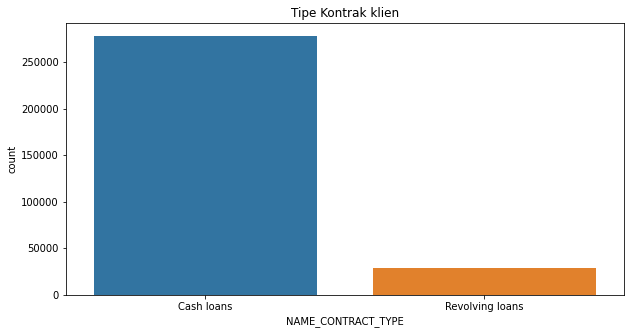

In [ ]:
# Kita cek NAME_CONTRACT_TYPE
# Check Occupation Type after fill the nan
plt.figure(figsize= (10,5))
sns.countplot(app['NAME_CONTRACT_TYPE'])
plt.title('Tipe Kontrak klien')
plt.show

In [ ]:
# Kita lihat perbandingan antara Male dan Female
# go.pie(values=app['CODE_GENDER'].value_counts(), names=app['CODE_GENDER'].unique()')
pie_gender = px.pie(data_frame= app, names= 'CODE_GENDER')
pie_gender

Data yang kita dapat ternyata mempunyai klien perempuan yang lebih banyak daripada klien pria


In [ ]:
# perbandingan gender target = 1
pie_gender = px.pie(data_frame= app[app['TARGET'] == 1], names= 'CODE_GENDER')
pie_gender

Untuk klien yang gagal membayar juga di dominasi oleh perempuan daripada laki-laki

## Check Occupation Type

0    282679
1     24825
Name: TARGET, dtype: int64


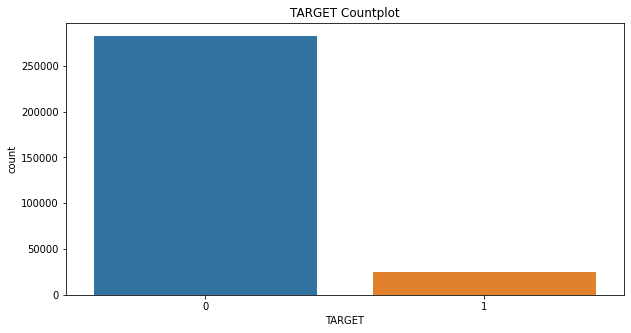

In [ ]:
# Check Occupation Type
plt.figure(figsize= (10,5))
sns.countplot(app['TARGET'])
plt.title('TARGET Countplot')
# plt.xticks(rotation=90)
plt.show



Data yang kita punya ini sangat imbalance. Namun kita lanjutkan dulu untuk EDA nya

Coba kita cek korelasi antar kolomnya

In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
categorical_columns = app.select_dtypes('object').columns

import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(app['TARGET'], app[i]))

res = pd.DataFrame(data = [categorical_columns, cramers] 
             ).T 
res.columns = ['Column', 'Cramers_V']
res.sort_values(by = 'Cramers_V', ascending = False)

Korelasi antara kolom-kolom kategorikal dengan target mempunyai nilai yang tidak terlalu signifikan, namun dari kolom tersebut, OCCUPATION_TYPE mempunyai korelasi paling tinggi

In [ ]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(app['TARGET'], app[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
res

In [ ]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in app.select_dtypes(exclude = 'object').columns:
    print(i)
    print('Correlation Ratio: {}'.format(correlation_ratio(app['TARGET'], app[i])))
    if shapiro(app[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(app[i]), kurtosis(app[i])))
    sns.distplot(app[i])
    plt.title(i)
    plt.show()
    print('\n')
    

In [ ]:
# Check Occupation Type
plt.figure(figsize= (50,50))
sns.heatmap(app.corr('spearman'), annot = True)
plt.title('Correlation Ratio')
# plt.xticks(rotation=90)
plt.show

In [ ]:
corr_cat = []
for i in categorical_columns:
    temp = []
    for j in categorical_columns:
        temp.append(cramers_v(app[i], app[j]))
    corr_cat.append(temp)    

corr_cat_res = pd.DataFrame(corr_cat, index = categorical_columns, columns = categorical_columns)

plt.figure(figsize = (10,10))
sns.heatmap(corr_cat_res, annot = True)